In [2]:
import pandas as pd
import altair as alt

In [3]:
df_zona_sul = pd.read_excel('BaseViolencia.xlsx')
df_zona_sul

,mes,ano,mes_ano,município,regiao,bairro,cisp,roubo_transeunte,roubo_celular,roubo_em_coletivo,...,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
0,1,2003,2003-01-01,Rio de Janeiro,Zona Sul,"Catete, Flamengo, Laranjeiras, Glória, Cosme V...",9,18,16,10,...,NaN,41,124,87,40,1,16,NaN,124,268
1,1,2003,2003-01-01,Rio de Janeiro,Zona Sul,"Botafogo, Humaitá, Urca",10,26,17,10,...,NaN,26,112,78,32,0,21,NaN,159,290
2,1,2003,2003-01-01,Rio de Janeiro,Zona Sul,"Copacabana, Leme",12,20,22,5,...,NaN,70,131,15,57,1,29,NaN,154,256
3,1,2003,2003-01-01,Rio de Janeiro,Zona Sul,Ipanema,13,20,10,4,...,NaN,30,79,19,31,1,34,NaN,132,217
4,1,2003,2003-01-01,Rio de Janeiro,Zona Sul,Leblon e Ipanema,14,25,11,6,...,NaN,37,118,30,30,2,36,NaN,213,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,9,2024,2024-09-01,Rio de Janeiro,Zona Sul,"Botafogo, Humaitá, Urca",10,65,45,7,...,9.0,15,173,28,21,25,82,17.0,174,347
1562,9,2024,2024-09-01,Rio de Janeiro,Zona Sul,"Copacabana, Leme",12,21,13,3,...,1.0,5,44,25,46,9,83,21.0,162,346
1563,9,2024,2024-09-01,Rio de Janeiro,Zona Sul,Ipanema,13,15,7,0,...,1.0,4,29,6,34,8,31,12.0,81,172
1564,9,2024,2024-09-01,Rio de Janeiro,Zona Sul,Leblon e Ipanema,14,22,25,2,...,0.0,8,60,20,29,5,127,31.0,196,408


Aqui colocamos em percentuais para conseguirmos comparar a representatividade dos roubos em cada bairro, vendo seus destaques e especificidades.

In [4]:
# Ajustando os dados para incluir o total combinado de roubos e furtos
df_zona_sul['total_crimes'] = df_zona_sul['total_roubos'] + df_zona_sul['total_furtos']

# Gráfico principal com roubos, furtos e total combinado
grafico_linha = alt.Chart(df_zona_sul).transform_fold(
    ['total_roubos', 'total_furtos'],
    as_=['Tipo de Crime', 'Quantidade']
).mark_line(strokeWidth=3).encode(
    x=alt.X('mes_ano:T', title='Mês/Ano', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Quantidade:Q', title='Quantidade de Crimes', scale=alt.Scale(zero=False)),
    color=alt.Color('Tipo de Crime:N', title='Tipo de Crime'),
    tooltip=['mes_ano:T', 'Tipo de Crime:N', 'Quantidade:Q']
).properties(
    width=700,
    height=400,
    title='Evolução de Roubos e Furtos ao Longo do Tempo'
).configure_title(
    fontSize=16,
    anchor='start'
)

grafico_linha.show()


alt.Chart(...)

In [7]:
# Ajustando o DataFrame para incluir todos os tipos de roubo
df_roubos = df_zona_sul.melt(
    id_vars=["bairro"], 
    value_vars=[
        "roubo_veiculo", "roubo_transeunte", "roubo_celular", "roubo_bicicleta",
        "roubo_em_coletivo", "roubo_carga", "roubo_residencia", "roubo_comercio",
        "roubo_apos_saque", "roubo_cx_eletronico", "roubo_conducao_saque", 
        "roubo_banco", "outros_roubos", "roubo_rua"
    ], 
    var_name="tipo_roubo", 
    value_name="quantidade"
)

# Agrupando e calculando percentuais por bairro
df_percentuais = (
    df_roubos.groupby(["bairro", "tipo_roubo"])["quantidade"]
    .sum()
    .reset_index()
)
df_percentuais["percentual"] = (
    df_percentuais.groupby("bairro")["quantidade"]
    .transform(lambda x: (x / x.sum()) * 100)
)

# Ordenando os tipos de roubo dentro de cada bairro pelo percentual
df_percentuais = df_percentuais.sort_values(by=["bairro", "percentual"], ascending=[True, False])

# Criando o gráfico de barras segmentadas com cores personalizadas
grafico = alt.Chart(df_percentuais).mark_bar().encode(
    x=alt.X("percentual:Q", stack="normalize", title="Proporção (%)"),
    y=alt.Y("bairro:N", sort="-x", title="Bairro"),
    color=alt.Color(
        "tipo_roubo:N", 
        title="Tipo de Roubo", 
        scale=alt.Scale(
            range=[
                "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
                "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
                "#bcbd22", "#17becf", "#aec7e8", "#ffbb78", "#98df8a"
            ]
        )
    ),
    order=alt.Order("percentual:Q", sort="ascending"),  # Ordenação dos segmentos
    tooltip=["bairro:N", "tipo_roubo:N", "quantidade:Q", "percentual:Q"]
).properties(
    title="Distribuição Percentual dos Tipos de Roubo por Bairro na Zona Sul",
    width=600,
    height=400
).configure_title(
    fontSize=16,
    anchor="start"
)

grafico.show()

alt.Chart(...)

In [ ]:
# Criando o gráfico de barras segmentadas com cores vivas específicas para cada tipo de roubo
grafico = alt.Chart(df_percentuais).mark_bar().encode(
    x=alt.X("percentual:Q", stack="normalize", title="Proporção (%)"),
    y=alt.Y("bairro:N", sort="-x", title="Bairro"),
    color=alt.Color(
        "tipo_roubo:N", 
        title="Tipo de Roubo", 
        scale=alt.Scale(
            domain=[
                "roubo_veiculo", "roubo_transeunte", "roubo_celular", "roubo_bicicleta",
                "roubo_em_coletivo", "roubo_carga", "roubo_residencia", "roubo_comercio",
                "roubo_apos_saque", "roubo_cx_eletronico", "roubo_conducao_saque", 
                "roubo_banco", "outros_roubos", "roubo_rua"
            ],
            range=[
                "#FF5733",  # roubo_veiculo
                "#33FF57",  # roubo_transeunte
                "#3357FF",  # roubo_celular
                "#FF33A1",  # roubo_bicicleta
                "#FFC300",  # roubo_em_coletivo
                "#33FFF5",  # roubo_carga
                "#F5FF33",  # roubo_residencia
                "#FF33F5",  # roubo_comercio
                "#A633FF",  # roubo_apos_saque
                "#33A6FF",  # roubo_cx_eletronico
                "#FF9A33",  # roubo_conducao_saque
                "#33FF9A",  # roubo_banco
                "#A3FF33",  # outros_roubos
                "#FF5733"   # roubo_rua
            ]
        )
    ),
    order=alt.Order("percentual:Q", sort="ascending"),
    tooltip=["bairro:N", "tipo_roubo:N", "quantidade:Q", "percentual:Q"]
).properties(
    title="Distribuição Percentual dos Tipos de Roubo por Bairro na Zona Sul",
    width=600,
    height=400
).configure_title(
    fontSize=16,
    anchor="start"
)

grafico.show()


alt.Chart(...)

In [12]:
# Ordenando os bairros pelo total de roubos
total_roubos_por_bairro = (
    df_percentuais.groupby("bairro")["quantidade"].sum().reset_index()
    .sort_values(by="quantidade", ascending=False)
)

# Adicionando a ordem no DataFrame original
df_percentuais["bairro"] = pd.Categorical(
    df_percentuais["bairro"],
    categories=total_roubos_por_bairro["bairro"],
    ordered=True
)

# Criando o gráfico de barras segmentadas com cores ajustadas
grafico = alt.Chart(df_percentuais).mark_bar().encode(
    x=alt.X("percentual:Q", stack="normalize", title="Proporção (%)"),
    y=alt.Y("bairro:N", sort="ascending", title="Bairro"),
    color=alt.Color(
        "tipo_roubo:N", 
        title="Tipo de Roubo", 
        scale=alt.Scale(
            domain=[
                "roubo_veiculo", "roubo_transeunte", "roubo_celular", "roubo_bicicleta",
                "roubo_em_coletivo", "roubo_carga", "roubo_residencia", "roubo_comercio",
                "roubo_apos_saque", "roubo_cx_eletronico", "roubo_conducao_saque", 
                "roubo_banco", "outros_roubos", "roubo_rua"
            ],
            range=[
                "#4E79A7",  # roubo_veiculo - Azul Suave
                "#228B22",  # roubo_transeunte - Verde Escuro
                "#E15759",  # roubo_celular - Vermelho
                "#76B7B2",  # roubo_bicicleta - Verde Água
                "#59A14F",  # roubo_em_coletivo - Verde
                "#EDC949",  # roubo_carga - Amarelo
                "#AF7AA1",  # roubo_residencia - Roxo Claro
                "#FF9DA7",  # roubo_comercio - Rosa Claro
                "#9C755F",  # roubo_apos_saque - Marrom Claro
                "#BAB0AB",  # roubo_cx_eletronico - Cinza Claro
                "#D37295",  # roubo_conducao_saque - Rosa Escuro
                "#FABFD2",  # roubo_banco - Rosa Suave
                "#9467BD",  # outros_roubos - Lilás
                "#1F77B4"   # roubo_rua - Azul Claro
            ]
        )
    ),
    order=alt.Order("percentual:Q", sort="ascending"),
    tooltip=["bairro:N", "tipo_roubo:N", "quantidade:Q", "percentual:Q"]
).properties(
    title="Distribuição Percentual dos Tipos de Roubo por Bairro na Zona Sul",
    width=600,
    height=400
).configure_title(
    fontSize=16,
    anchor="start"
)

grafico.show()

alt.Chart(...)

In [3]:
import pandas as pd

# Criando a lista de bairros e suas regiões
dados = [
    {"Região": "Botafogo, Humaitá e Urca", "Bairro": "Botafogo", "Endereço": "Botafogo, Rio de Janeiro, RJ"},
    {"Região": "Botafogo, Humaitá e Urca", "Bairro": "Humaitá", "Endereço": "Humaitá, Rio de Janeiro, RJ"},
    {"Região": "Botafogo, Humaitá e Urca", "Bairro": "Urca", "Endereço": "Urca, Rio de Janeiro, RJ"},
    {"Região": "Copacabana, Leme", "Bairro": "Copacabana", "Endereço": "Copacabana, Rio de Janeiro, RJ"},
    {"Região": "Copacabana, Leme", "Bairro": "Leme", "Endereço": "Leme, Rio de Janeiro, RJ"},
    {"Região": "Leblon e Ipanema", "Bairro": "Ipanema", "Endereço": "Ipanema, Rio de Janeiro, RJ"},
    {"Região": "Leblon e Ipanema", "Bairro": "Leblon", "Endereço": "Leblon, Rio de Janeiro, RJ"},
    {"Região": "Gávea, Jardim Botânico, Lagoa e São Conrado", "Bairro": "Lagoa", "Endereço": "Lagoa, Rio de Janeiro, RJ"},
    {"Região": "Gávea, Jardim Botânico, Lagoa e São Conrado", "Bairro": "Jardim Botânico", "Endereço": "Jardim Botânico, Rio de Janeiro, RJ"},
    {"Região": "Gávea, Jardim Botânico, Lagoa e São Conrado", "Bairro": "São Conrado", "Endereço": "São Conrado, Rio de Janeiro, RJ"},
    {"Região": "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho", "Bairro": "Catete", "Endereço": "Catete, Rio de Janeiro, RJ"},
    {"Região": "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho", "Bairro": "Flamengo", "Endereço": "Flamengo, Rio de Janeiro, RJ"},
    {"Região": "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho", "Bairro": "Glória", "Endereço": "Glória, Rio de Janeiro, RJ"},
    {"Região": "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho", "Bairro": "Laranjeiras", "Endereço": "Laranjeiras, Rio de Janeiro, RJ"},
    {"Região": "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho", "Bairro": "Cosme Velho", "Endereço": "Cosme Velho, Rio de Janeiro, RJ"}
]

# Convertendo para DataFrame
df_enderecos = pd.DataFrame(dados)

# Salvando como CSV para referência futura
df_enderecos.to_csv("ListaEnderecos_ZonaSul.csv", index=False, encoding="utf-8")

# Visualizando a tabela
df_enderecos

,Região,Bairro,Endereço
0,"Botafogo, Humaitá e Urca",Botafogo,"Botafogo, Rio de Janeiro, RJ"
1,"Botafogo, Humaitá e Urca",Humaitá,"Humaitá, Rio de Janeiro, RJ"
2,"Botafogo, Humaitá e Urca",Urca,"Urca, Rio de Janeiro, RJ"
3,"Copacabana, Leme",Copacabana,"Copacabana, Rio de Janeiro, RJ"
4,"Copacabana, Leme",Leme,"Leme, Rio de Janeiro, RJ"
5,Leblon e Ipanema,Ipanema,"Ipanema, Rio de Janeiro, RJ"
6,Leblon e Ipanema,Leblon,"Leblon, Rio de Janeiro, RJ"
7,"Gávea, Jardim Botânico, Lagoa e São Conrado",Lagoa,"Lagoa, Rio de Janeiro, RJ"
8,"Gávea, Jardim Botânico, Lagoa e São Conrado",Jardim Botânico,"Jardim Botânico, Rio de Janeiro, RJ"
9,"Gávea, Jardim Botânico, Lagoa e São Conrado",São Conrado,"São Conrado, Rio de Janeiro, RJ"


In [4]:
import geopandas as gpds

In [10]:
df_enderecos = pd.read_csv("ListaEnderecos_ZonaSul.csv", encoding='UTF8')


In [11]:
gpds.tools.geocode(df_enderecos["Endereço"], provider = "nominatim", user_agent="Intro Geocode")

,geometry,address
0,POINT (-43.1863 -22.95151),"Botafogo, Rio de Janeiro, Região Geográfica Im..."
1,POINT (-43.20048 -22.95464),"Humaitá, Rio de Janeiro, Região Geográfica Ime..."
2,POINT (-43.16797 -22.95407),"Urca, Rio de Janeiro, Região Geográfica Imedia..."
3,POINT (-43.1843 -22.97197),"Copacabana, Rio de Janeiro, Região Geográfica ..."
4,POINT (-43.1669 -22.9617),"Leme, Rio de Janeiro, Região Geográfica Imedia..."
5,POINT (-43.20222 -22.98396),"Ipanema, Rio de Janeiro, Região Geográfica Ime..."
6,POINT (-43.22497 -22.98346),"Leblon, Rio de Janeiro, Região Geográfica Imed..."
7,POINT (-43.20249 -22.96247),"Lagoa, Rio de Janeiro, Região Geográfica Imedi..."
8,POINT (-43.22335 -22.96364),"Jardim Botânico, Rio de Janeiro, Região Geográ..."
9,POINT (-43.26753 -22.99136),"São Conrado, Rio de Janeiro, Região Geográfica..."


In [13]:
df_enderecos["Geom"] = gpds.tools.geocode(df_enderecos["Endereço"], provider = "nominatim", user_agent="Intro Geocode")["geometry"]

In [15]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon

# Criando um dicionário com as regiões e coordenadas ajustadas (o último ponto repete o primeiro)
regioes = {
    "Botafogo, Humaitá, Urca": [(-43.1863, -22.9515), (-43.20048, -22.95464), (-43.16797, -22.95047), (-43.1863, -22.9515)],
    "Copacabana, Leme": [(-43.1843, -22.97197), (-43.1669, -22.96171), (-43.1843, -22.97197)],
    "Ipanema, Leblon": [(-43.20222, -22.98396), (-43.22497, -22.98346), (-43.20222, -22.98396)],
    "Gávea, Jardim Botânico, Lagoa, São Conrado": [(-43.20249, -22.96247), (-43.22335, -22.96364), (-43.26755, -22.99136), (-43.20249, -22.96247)],
    "Catete, Flamengo, Glória, Laranjeiras, Cosme Velho": [(-43.18022, -22.92629), (-43.17457, -22.93398), (-43.17392, -22.91832), (-43.18782, -22.93432), (-43.20062, -22.94151), (-43.18022, -22.92629)]
}

# Criando polígonos com os pontos ajustados
geometries = [Polygon(coords) for coords in regioes.values()]
gdf = gpd.GeoDataFrame({'regiao': list(regioes.keys()), 'geometry': geometries})

# Adicionando dados fictícios de crimes (substituir pelos dados reais)
gdf['crime_mais_comum'] = ['roubo_transeunte', 'furto_celular', 'roubo_veiculo', 'roubo_rua', 'outros_roubos']
gdf['quantidade_total'] = [500, 400, 600, 800, 300]  # Substituir pelos valores reais

# Criando o mapa
mapa = folium.Map(location=[-22.97, -43.2], zoom_start=13)

# Adicionando polígonos ao mapa
for _, row in gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, cor=row['crime_mais_comum']: {
            'fillColor': '#FF0000' if cor == 'roubo_veiculo' else '#008000' if cor == 'roubo_rua' else '#FFFF00',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5,
        },
        tooltip=folium.Tooltip(f"<b>Região:</b> {row['regiao']}<br><b>Crime Mais Comum:</b> {row['crime_mais_comum']}<br><b>Quantidade:</b> {row['quantidade_total']}"),
    ).add_to(mapa)

# Salvando o mapa em um arquivo HTML
mapa.save("mapa_crimes_zona_sul.html")
mapa

In [16]:
from shapely.geometry import Polygon

# Definição dos polígonos com coordenadas aproximadas dos bairros
poligonos = {
    "Botafogo, Humaitá, Urca": Polygon([
        (-43.1863, -22.9515),  # Botafogo
        (-43.20048, -22.95464),  # Humaitá
        (-43.16797, -22.95047)   # Urca
    ]),
    "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho": Polygon([
        (-43.18022, -22.92969),  # Catete
        (-43.17457, -22.93398),  # Flamengo
        (-43.17392, -22.91832),  # Glória
        (-43.18782, -22.93432),  # Laranjeiras
        (-43.20062, -22.94151)   # Cosme Velho
    ]),
    "Copacabana, Leme": Polygon([
        (-43.1843, -22.97197),  # Copacabana
        (-43.1669, -22.96171)   # Leme
    ]),
    "Ipanema, Leblon": Polygon([
        (-43.20222, -22.98396),  # Ipanema
        (-43.22497, -22.98346)   # Leblon
    ]),
    "Gávea, Jardim Botânico, Lagoa e São Conrado": Polygon([
        (-43.20249, -22.96247),  # Lagoa
        (-43.22335, -22.96364),  # Jardim Botânico
        (-43.26753, -22.99136),  # São Conrado
        (-43.22947, -22.98546)   # Gávea
    ])
}

# Visualizando os polígonos
for regiao, poligono in poligonos.items():
    print(f"Região: {regiao}")
    print(f"Coordenadas: {list(poligono.exterior.coords)}")
    print()

ValueError: A linearring requires at least 4 coordinates.

In [20]:
df_mapa = pd.read_csv('Limite_de_Bairros.csv')
df_mapa

,objectid,área,nome,regiao_adm,area_plane,codbairro,codra,codbnum,link,rp,cod_rp,codbairro_long,st_areashape,st_perimetershape
0,325,1.705685e+06,Paquetá,PAQUETA,1,13,21,13,Paqueta&area=013 ...,Centro,1.1,13,1.705689e+06,24841.459984
1,326,4.056403e+06,Freguesia (Ilha),ILHA DO GOVERNADOR,3,98,20,98,Freguesia (Ilha) &area=98 ...,Ilha do Governador,3.7,98,4.056414e+06,18303.621385
2,327,9.780465e+05,Bancários,ILHA DO GOVERNADOR,3,97,20,97,Bancários &area=97 ...,Ilha do Governador,3.7,97,9.780492e+05,7758.791895
3,328,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20,104,Galeão &area=104 ...,Ilha do Governador,3.7,104,1.895747e+07,21510.088396
4,329,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20,101,Tauá &area=101 ...,Ilha do Governador,3.7,101,1.672550e+06,8246.120720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,512,2.534304e+06,Gericinó,BANGU,5,160,17,160,Gericinó &area=160,Bangu,5.1,160,2.534311e+06,8828.555709
161,513,3.273271e+05,Jabour,BANGU,5,163,17,163,Jabour &area=163,Bangu,5.1,163,3.273280e+05,2235.748407
162,890,1.473737e+06,Vila Kennedy,BANGU,5,162,17,162,Vila Kennedy &area=162,Bangu,5.1,162,1.473741e+06,6789.609579
163,894,7.714616e+06,Ilha de Guaratiba,GUARATIBA,5,164,26,164,Ilha de Guaratiba &area=164,Guaratiba,5.4,164,7.714637e+06,13955.136856


In [29]:
filtro_zs = df_mapa[df_mapa['rp'] == 'Zona Sul']
filtro_zs.to_csv('Limites_filtrados.csv')
filtro_zs


,objectid,área,nome,regiao_adm,area_plane,codbairro,codra,codbnum,link,rp,cod_rp,codbairro_long,st_areashape,st_perimetershape
111,438,1.140065e+06,Glória,BOTAFOGO,2,16,4,16,Glória &area=16 ...,Zona Sul,2.1,16,1.140069e+06,7225.248107
120,447,6.810267e+05,Catete,BOTAFOGO,2,18,4,18,Catete &area=18 ...,Zona Sul,2.1,18,6.810285e+05,4260.147747
121,448,1.646254e+06,Flamengo,BOTAFOGO,2,15,4,15,Flamengo &area=15 ...,Zona Sul,2.1,15,1.646258e+06,6665.349163
122,449,2.493507e+06,Laranjeiras,BOTAFOGO,2,17,4,17,Laranjeiras &area=17 ...,Zona Sul,2.1,17,2.493514e+06,10537.128736
126,453,8.925401e+05,Cosme Velho,BOTAFOGO,2,19,4,19,Cosme Velho &area=19 ...,Zona Sul,2.1,19,8.925425e+05,7889.681452
128,455,4.798956e+06,Botafogo,BOTAFOGO,2,20,4,20,Botafogo &area=20 ...,Zona Sul,2.1,20,4.798969e+06,12136.391939
129,456,2.319002e+06,Urca,BOTAFOGO,2,22,4,22,Urca &area=22 ...,Zona Sul,2.1,22,2.319008e+06,14138.523910
135,462,1.054475e+06,Humaitá,BOTAFOGO,2,21,4,21,Humaitá &area=21 ...,Zona Sul,2.1,21,1.054478e+06,7100.855819
137,464,2.689204e+06,Jardim Botânico,LAGOA,2,28,6,28,Jardim Botânico &area=28 ...,Zona Sul,2.1,28,2.689211e+06,12263.131623
139,466,4.100850e+06,Copacabana,COPACABANA,2,24,5,24,Copacabana &area=24 ...,Zona Sul,2.1,24,4.100861e+06,12803.516209


In [33]:
filtro_zs['st_areashape'].dtype

dtype('float64')

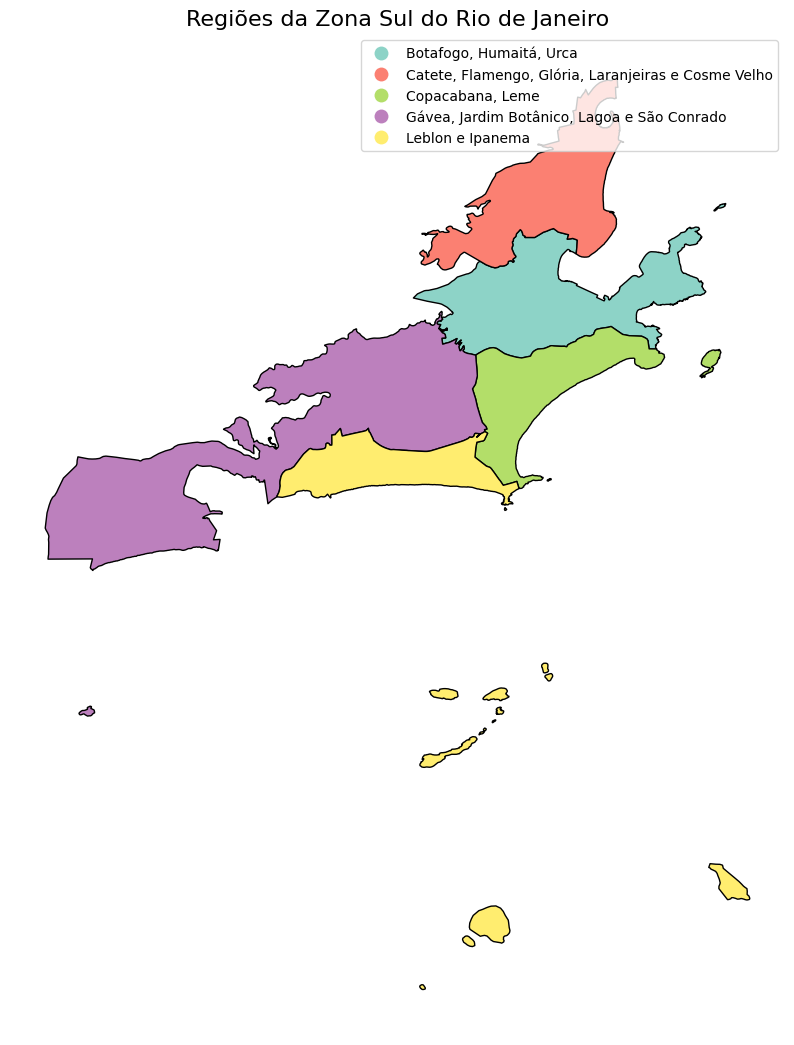

In [62]:
import geopandas as gpd

# Carregar o arquivo GeoJSON
geojson_path = "Limite_de_Bairros.geojson"  # Substitua pelo caminho correto
gdf = gpd.read_file(geojson_path)

# Definir os grupos de bairros para cada região
bairros = {
    "Botafogo, Humaitá, Urca": ["Botafogo", "Humaitá", "Urca"],
    "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho": ["Catete", "Flamengo", "Glória", "Laranjeiras", "Cosme Velho"],
    "Copacabana, Leme": ["Copacabana", "Leme"],
    "Gávea, Jardim Botânico, Lagoa e São Conrado": ["Gávea", "Jardim Botânico", "Lagoa", "São Conrado"],
    "Leblon e Ipanema": ["Leblon", "Ipanema"]
}

# Filtrar apenas os bairros da Zona Sul
# Criar uma nova coluna 'regiao' com base nos grupos definidos
gdf["bairro"] = None

for bairro, bairros in bairros.items():
    gdf.loc[gdf["nome"].isin(bairros), "bairro"] = bairro

# Filtrar apenas os bairros que pertencem às regiões definidas
gdf_zona_sul = gdf[gdf["bairro"].notnull()]

# Dissolver as geometrias por região (agrupando os bairros por região)
gdf_regioes = gdf_zona_sul.dissolve(by="bairro", as_index=False)

# Plotar o mapa para visualizar as regiões
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 40))
gdf_regioes.plot(ax=ax, column="bairro", legend=True, edgecolor="black", cmap="Set3")
plt.title("Regiões da Zona Sul do Rio de Janeiro", fontsize=16)
plt.axis("off")
plt.show()

# Salvar o GeoJSON com as regiões agrupadas
gdf_regioes.to_file("Regioes_Zona_Sul.geojson", driver="GeoJSON")

In [48]:
geojson_agrupado = gpd.read_file('Regioes_Zona_Sul.geojson')
geojson_agrupado.columns

Index(['regiao', 'objectid', 'área', 'nome', 'regiao_adm', 'area_plane',
       'codbairro', 'codra', 'codbnum', 'link', 'rp', 'cod_rp',
       'codbairro_long', 'st_areashape', 'st_perimetershape', 'geometry'],
      dtype='object')

In [55]:
import geopandas as gpd

# Carregar o arquivo GeoJSON
geojson_path = "Regioes_Zona_Sul.geojson"
gdf = gpd.read_file(geojson_path)

# Salvar como CSV
csv_path = "Regioes_Zona_Sul.csv"
gdf.to_csv(csv_path, index=False)

print(f"GeoJSON convertido para CSV e salvo em: {csv_path}")

GeoJSON convertido para CSV e salvo em: Regioes_Zona_Sul.csv


In [58]:
df_zona_geo = pd.read_csv('Regioes_Zona_Sul.csv')
df_zona_geo

,regiao,objectid,área,nome,regiao_adm,area_plane,codbairro,codra,codbnum,link,rp,cod_rp,codbairro_long,st_areashape,st_perimetershape,geometry
0,"Botafogo, Humaitá, Urca",455,4.798956e+06,Botafogo,BOTAFOGO,2,20,4,20,Botafogo &area=20 ...,Zona Sul,2.1,20,4.798969e+06,12136.391939,MULTIPOLYGON (((-43.19901357398269 -22.9624069...
1,"Catete, Flamengo, Glória, Laranjeiras e Cosme ...",438,1.140065e+06,Glória,BOTAFOGO,2,16,4,16,Glória &area=16 ...,Zona Sul,2.1,16,1.140069e+06,7225.248107,POLYGON ((-43.19965558631965 -22.9433368098720...
2,"Copacabana, Leme",466,4.100850e+06,Copacabana,COPACABANA,2,24,5,24,Copacabana &area=24 ...,Zona Sul,2.1,24,4.100861e+06,12803.516209,MULTIPOLYGON (((-43.18250496691897 -22.9864852...
3,"Gávea, Jardim Botânico, Lagoa e São Conrado",464,2.689204e+06,Jardim Botânico,LAGOA,2,28,6,28,Jardim Botânico &area=28 ...,Zona Sul,2.1,28,2.689211e+06,12263.131623,MULTIPOLYGON (((-43.27535779568179 -23.0297350...
4,Leblon e Ipanema,472,2.153096e+06,Leblon,LAGOA,2,26,6,26,Leblon &area=26 ...,Zona Sul,2.1,26,2.153102e+06,7188.672220,MULTIPOLYGON (((-43.20847617797942 -23.0821021...


In [66]:
# Verifique os dados no GeoJSON após a união
print("GeoJSON com dados de crimes:")
print(gdf_regioes[["bairro", "total_crimes"]])

# Verifique os dados no DataFrame de crimes agrupados
print("DataFrame de crimes agrupados:")
print(df_crimes_grouped)

GeoJSON com dados de crimes:
                                              bairro  total_crimes
0                            Botafogo, Humaitá, Urca       99404.0
1  Catete, Flamengo, Glória, Laranjeiras e Cosme ...           NaN
2                                   Copacabana, Leme      116050.0
3        Gávea, Jardim Botânico, Lagoa e São Conrado           NaN
4                                   Leblon e Ipanema      110214.0
DataFrame de crimes agrupados:
                                              bairro  total_crimes
0                            Botafogo, Humaitá, Urca         99404
1  Catete, Flamengo, Laranjeiras, Glória, Cosme V...        101300
2                                   Copacabana, Leme        116050
3         Gávea, Jardim Botânico, Lagoa, São Conrado         42373
4                                            Ipanema         58463
5                                   Leblon e Ipanema        110214


In [1]:
import geopandas as gpd
import pandas as pd
import folium
from folium import Choropleth

# Carregar o GeoJSON
geojson_path = "Regioes_Zona_Sul.geojson"  # Substitua pelo caminho correto
gdf_regioes = gpd.read_file(geojson_path)

# Criar a coluna 'total_crimes' no df_zona_sul somando total_roubos e total_furtos
df_zona_sul["total_crimes"] = df_zona_sul["total_roubos"] + df_zona_sul["total_furtos"]

# Agrupar os dados por região
df_crimes_grouped = df_zona_sul.groupby("bairro")["total_crimes"].sum().reset_index()

rename_map = {
    "Catete, Flamengo, Laranjeiras, Glória, Cosme Velho": "Catete, Flamengo, Glória, Laranjeiras e Cosme Velho",
    "Gávea, Jardim Botânico, Lagoa, São Conrado": "Gávea, Jardim Botânico, Lagoa e São Conrado",
    "Leblon, Ipanema": "Leblon e Ipanema",
    "Copacabana, Leme": "Copacabana, Leme",
    "Botafogo, Urca, Humaitá": "Botafogo, Humaitá, Urca"
}

# Renomear os bairros no DataFrame de crimes
df_crimes_grouped["bairro"] = df_crimes_grouped["bairro"].replace(rename_map)

cores_fixas = {
    99404: "#FEB24C",  # # Laranja
    101300: "#FF7F32",  # Laranja mais forte
    110214: "#FD7463",  # Vermelho mais claro
    116050: "#FC4E2A",   # Vermelho
    42373: "#FFFFB2"  # Amarelo claro
}

# Mapear as cores para cada valor no DataFrame
df_crimes_grouped["cor"] = df_crimes_grouped["total_crimes"].map(cores_fixas)

# Unir os dados do GeoJSON com os dados agrupados
gdf_regioes = gdf_regioes.merge(df_crimes_grouped, on="bairro", how="left")

# Converter o GeoDataFrame para GeoJSON
geojson_data = gdf_regioes.to_json()

# Criar o mapa com Folium
mapa = folium.Map(location=[-22.971, -43.182], zoom_start=13)

# Adicionar polígonos ao mapa com as cores fixas
for _, row in gdf_regioes.iterrows():
    folium.GeoJson(
        row["geometry"],
        style_function=lambda feature, color=row["cor"]: {
            "fillColor": color,
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.7
        }
    ).add_to(mapa)

# Exibir o mapa
mapa.save("mapa_criminalidade_categorias.html")
mapa


NameError: name 'df_zona_sul' is not defined